In [1]:
import sys
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/seqUtils/src/')
import time
from plotUtil import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches

In [2]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [3]:
gtfFile = '/private/groups/brookslab/gabai/projects/Add-seq/data/ref/Saccharomyces_cerevisiae.R64-1-1.109.gtf'
chrom_HMR= '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/231023_HMR_chrom_meanScore_medianPos_chrIII:290000-299000modScores.tsv'
neg_HMR= '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/modPredict/231023_HMR_neg_meanScore_medianPos_chrIII:290000-299000modScores.tsv'
pos_HMR= '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/modPredict/231023_HMR_pos_meanScore_medianPos_chrIII:290000-299000modScores.tsv'

In [4]:
chrom_CLN2= '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/231019_CLN2_chrom_meanScore_medianPos_chrXVI:66000-67550modScores.tsv'
neg_CLN2= '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/modPredict/231019_CLN2_neg_meanScore_medianPos_chrXVI:66000-67550modScores.tsv'
pos_CLN2= '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/modPredict/231019_CLN2_pos_meanScore_medianPos_chrXVI:66000-67550modScores.tsv'

In [5]:
chromPlot = 'chrIII'
pStart = 290000
pEnd = 299000

plotting gene annotations...
Reading modScore files...
clustering reads...
Imputing missing values...
plotting modification track on + strand...
clustering reads...
Imputing missing values...
plotting modification track on - strand...
finished plotting file:  /private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/231023_HMR_chrom_meanScore_medianPos_chrIII:290000-299000modScores.tsv
Reading modScore files...
clustering reads...
Imputing missing values...
plotting modification track on - strand...
clustering reads...
Imputing missing values...
plotting modification track on + strand...
finished plotting file:  /private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/modPredict/231023_HMR_neg_meanScore_medianPos_chrIII:290000-299000modScores.tsv
Reading modScore files...
clustering reads...
Imputing missing values...
plotting modification track on - strand...
finished plotting file:  /private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/modPredict/231023_HMR_pos_me

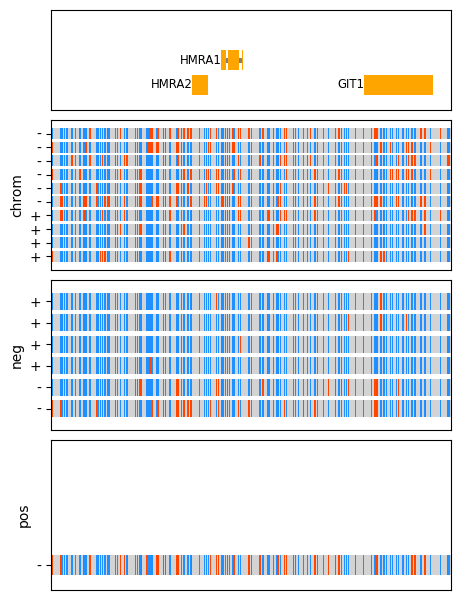

In [12]:
figureWidth=5
figureHeight=6.5
panelWidth=4
panelHeight=1.5

plt.figure(figsize=(figureWidth,figureHeight))
panel0 = plt.axes([0.5/figureWidth, 5.0/figureHeight, panelWidth/figureWidth, panelHeight/1.5/figureHeight])
panel1 = plt.axes([0.5/figureWidth, 3.4/figureHeight, panelWidth/figureWidth, panelHeight/figureHeight])
panel2 = plt.axes([0.5/figureWidth, 1.8/figureHeight, panelWidth/figureWidth, panelHeight/figureHeight])
panel3 = plt.axes([0.5/figureWidth, 0.2/figureHeight, panelWidth/figureWidth, panelHeight/figureHeight])

plotGtfTrack(plot=panel0, gtfFile=gtfFile, chromPlot=chromPlot, startPlot=pStart, endPlot=pEnd,
            features = ['CDS', 'start_codon'], adjust_features = [0, 10])

plotModTrack(plot=panel1, startPlot=pStart, endPlot=pEnd, threashold = 0.5,
             modScores=chrom_HMR, label_strand = True,
             cluster = True, n_clusters = 2, 
             outpath = '/private/groups/brookslab/gabai/projects/Add-seq/results/',
             prefix = '231024_chrom_HMR', annot = 'chrom')

plotModTrack(plot=panel2, startPlot=pStart, endPlot=pEnd, threashold = 0.5,
             modScores=neg_HMR, 
             cluster = True, n_clusters = 2,
             outpath = '/private/groups/brookslab/gabai/projects/Add-seq/results/',
             prefix = '231024_neg_HMR', annot = 'neg')

plotModTrack(plot=panel3, startPlot=pStart, endPlot=pEnd, threashold = 0.5,
             modScores=pos_HMR,
             outpath = '/private/groups/brookslab/gabai/projects/Add-seq/results/',
             cluster = True, n_clusters = 1, prefix = '231024_pos_HMR', annot = 'pos')
panel3.set_ylim(-1, 5)
outFile = '/private/groups/brookslab/gabai/projects/Add-seq/results/figures/231024_HMR_meanScore_medianPos_chrIII:290000-299000modScores.png'
plt.savefig(outFile, dpi = 1000)